In [15]:
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
# Step 1: Load dataset
df = pd.read_csv("Students.csv")

In [17]:
# Step 2: Handle missing values (drop rows missing key info)
df = df.dropna(subset=["Daily_Usage_Hours", "Impact_on_Grades", "Stream"])


In [18]:
# Step 3: Calculate average grade impact by stream
avg_impact = df.groupby("Stream")["Impact_on_Grades"].mean().sort_values(ascending=False)
print("Average Impact on Grades by Stream:\n", avg_impact, "\n")


Average Impact on Grades by Stream:
 Stream
Arts                0.317191
Science             0.166948
Medical             0.067616
Commerce            0.063187
Management         -0.081579
Pharmacy           -0.091270
Engineering        -0.112871
Law                -0.130081
Hotel-management   -0.135220
Agriculture        -0.282443
Name: Impact_on_Grades, dtype: float64 



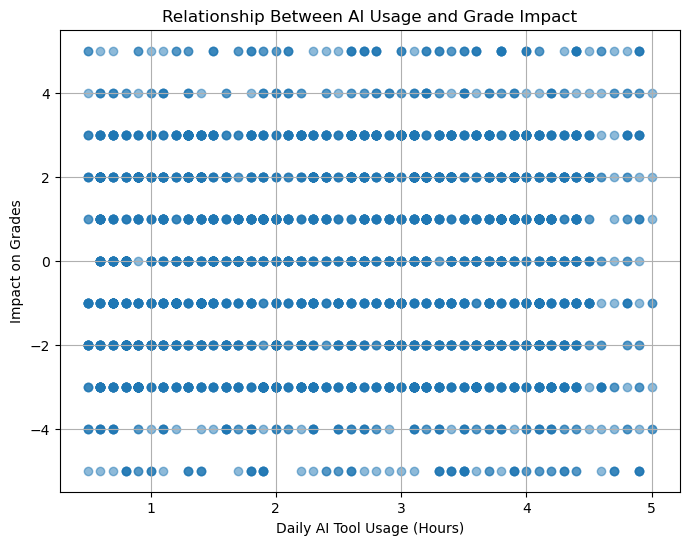

In [5]:
# Step 4: Visualize the relationship between AI usage and grade impact
plt.figure(figsize=(8,6))
plt.scatter(df["Daily_Usage_Hours"], df["Impact_on_Grades"], alpha=0.5)
plt.title("Relationship Between AI Usage and Grade Impact")
plt.xlabel("Daily AI Tool Usage (Hours)")
plt.ylabel("Impact on Grades")
plt.grid(True)
plt.show()

In [19]:
# Step 5: Compute correlation
correlation = df["Daily_Usage_Hours"].corr(df["Impact_on_Grades"])
print(f"Correlation between AI Usage and Grade Impact: {correlation:.3f}")

Correlation between AI Usage and Grade Impact: 0.057


In [20]:
#Insight
if correlation > 0:
    print("📈 Positive correlation: More AI use tends to improve grades.")
elif correlation < 0:
    print("📉 Negative correlation: More AI use tends to lower grades.")
else:
    print("⚖️ No strong relationship found between AI usage and grades.")


📈 Positive correlation: More AI use tends to improve grades.


Most Popular AI Tools:
 AI_Tools_Used
ChatGPT                     626
Gemini                      612
Copilot                     585
ChatGPT, Copilot            505
ChatGPT, Gemini, Copilot    426
Gemini, Midjourney          371
Claude                      171
Other                       167
Bard                        151
Name: count, dtype: int64 



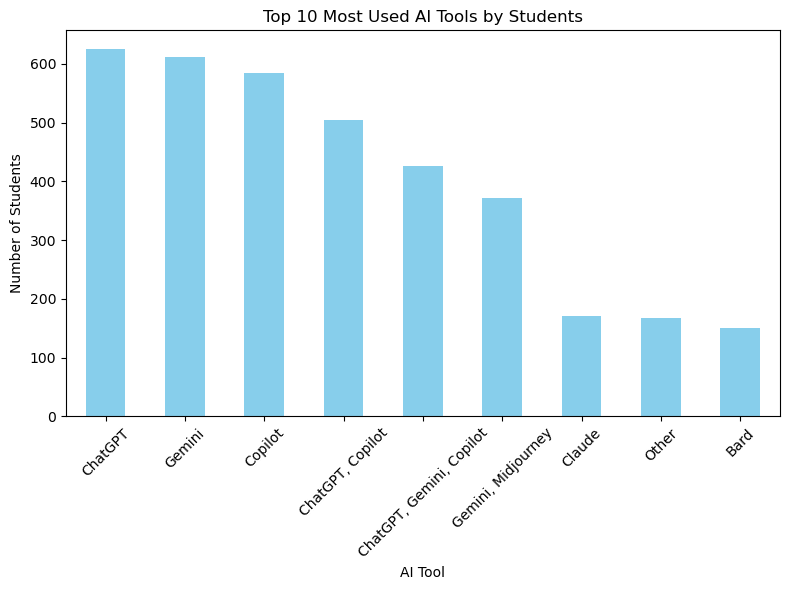

In [21]:
#Task 1: Find the Most Popular AI Tools Among Students

# Count most popular AI tools
ai_tool_counts = df["AI_Tools_Used"].value_counts().head(10)
print("Most Popular AI Tools:\n", ai_tool_counts, "\n")

# Visualize
plt.figure(figsize=(8,6))
ai_tool_counts.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Used AI Tools by Students")
plt.xlabel("AI Tool")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Do_Professors_Allow_Use
No     2.533192
Yes    2.588600
Name: Daily_Usage_Hours, dtype: float64 



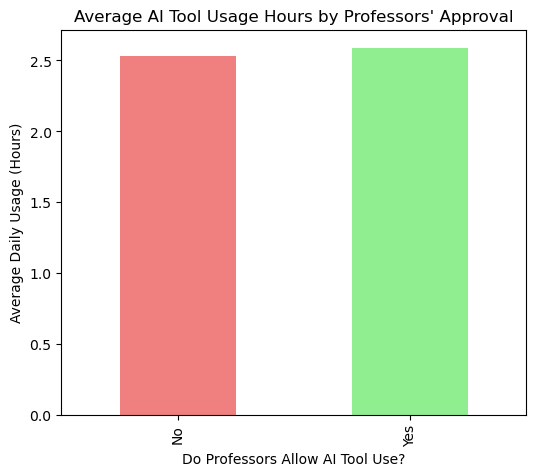

In [22]:
#Task 2: Analyze Professors’ Attitude vs. Students’ AI Usage

# Group by professors’ permission and find average daily usage
professor_usage = df.groupby("Do_Professors_Allow_Use")["Daily_Usage_Hours"].mean()
print(professor_usage, "\n")

# Visualization
plt.figure(figsize=(6,5))
professor_usage.plot(kind="bar", color=["lightcoral", "lightgreen"])
plt.title("Average AI Tool Usage Hours by Professors' Approval")
plt.xlabel("Do Professors Allow AI Tool Use?")
plt.ylabel("Average Daily Usage (Hours)")
plt.show()


Average Trust in AI Tools by Stream:
 Stream
Pharmacy            3.119048
Law                 3.097561
Science             3.082631
Agriculture         3.076336
Management          3.039474
Arts                3.021792
Medical             3.021352
Engineering         2.952475
Hotel-management    2.949686
Commerce            2.920330
Name: Trust_in_AI_Tools, dtype: float64 



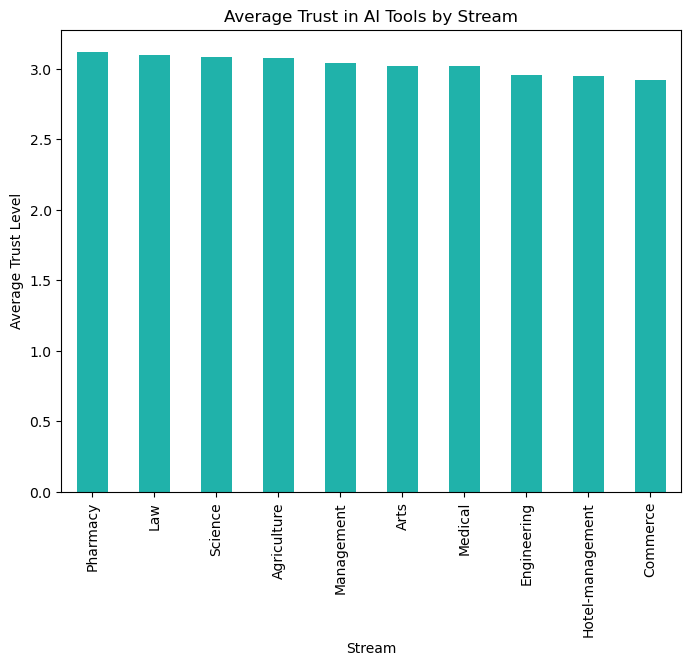

In [23]:
#Task 3: Compare Trust in AI Tools by Stream

# Calculate average trust per stream
avg_trust = df.groupby("Stream")["Trust_in_AI_Tools"].mean().sort_values(ascending=False)
print("Average Trust in AI Tools by Stream:\n", avg_trust, "\n")

# Bar plot
plt.figure(figsize=(8,6))
avg_trust.plot(kind="bar", color='lightseagreen')
plt.title("Average Trust in AI Tools by Stream")
plt.xlabel("Stream")
plt.ylabel("Average Trust Level")
plt.show()


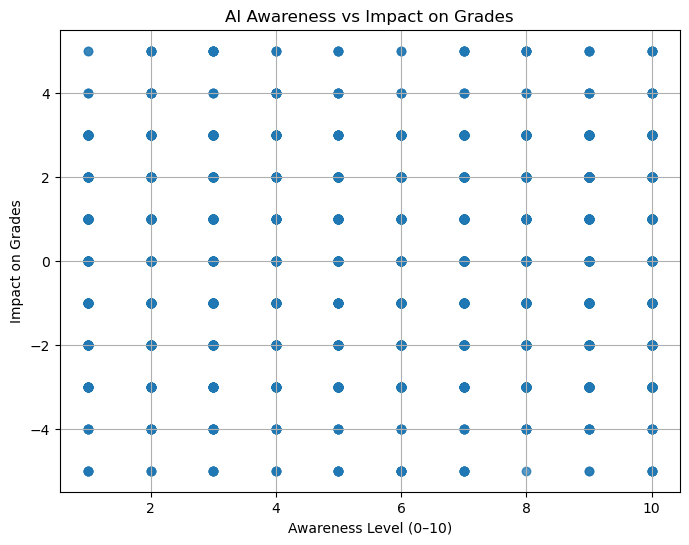

Correlation between Awareness and Grade Impact: -0.016


In [24]:
#Task 4: Relationship Between Awareness and Impact on Grades

# Scatter plot for awareness vs grade impact
plt.figure(figsize=(8,6))
plt.scatter(df["Awareness_Level"], df["Impact_on_Grades"], alpha=0.5)
plt.title("AI Awareness vs Impact on Grades")
plt.xlabel("Awareness Level (0–10)")
plt.ylabel("Impact on Grades")
plt.grid(True)
plt.show()

# Correlation
corr = df["Awareness_Level"].corr(df["Impact_on_Grades"])
print(f"Correlation between Awareness and Grade Impact: {corr:.3f}")


Average Willingness to Pay by AI Tool:
 AI_Tools_Used
Bard                        0.569536
Copilot                     0.512821
ChatGPT, Gemini, Copilot    0.511737
ChatGPT                     0.503195
ChatGPT, Copilot            0.493069
Gemini                      0.491830
Other                       0.479042
Gemini, Midjourney          0.471698
Claude                      0.461988
Name: Willing_to_Pay_for_Access, dtype: float64 



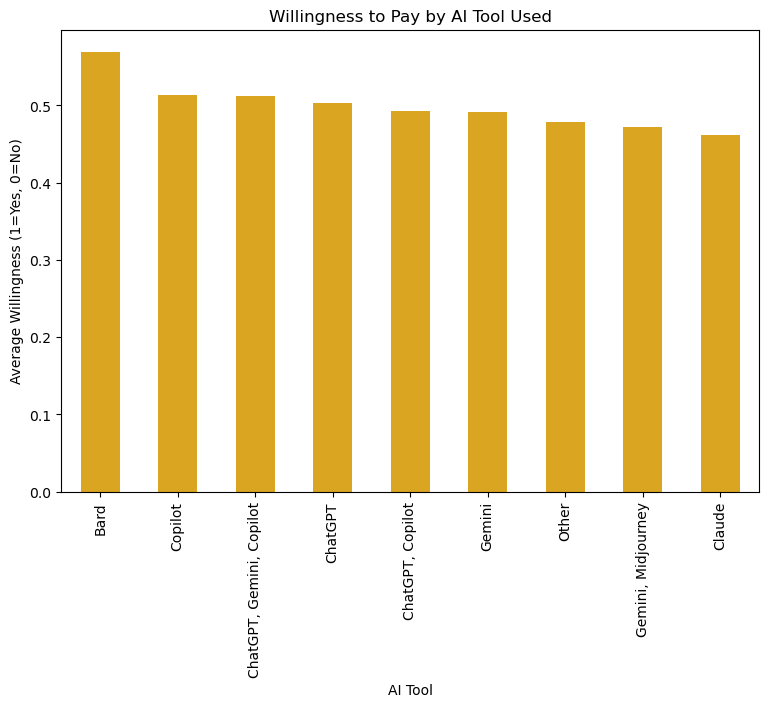

In [25]:
#Task 5: Predict Students’ Willingness to Pay Based on Usage

# Encode 'Willing_to_Pay_for_Access' to numeric
df["Willing_to_Pay_for_Access"] = df["Willing_to_Pay_for_Access"].map({"Yes": 1, "No": 0})

# Group average willingness by usage
avg_willingness = df.groupby("AI_Tools_Used")["Willing_to_Pay_for_Access"].mean().sort_values(ascending=False)
print("Average Willingness to Pay by AI Tool:\n", avg_willingness, "\n")

# Visualization
plt.figure(figsize=(9,6))
avg_willingness.plot(kind="bar", color="goldenrod")
plt.title("Willingness to Pay by AI Tool Used")
plt.xlabel("AI Tool")
plt.ylabel("Average Willingness (1=Yes, 0=No)")
plt.show()


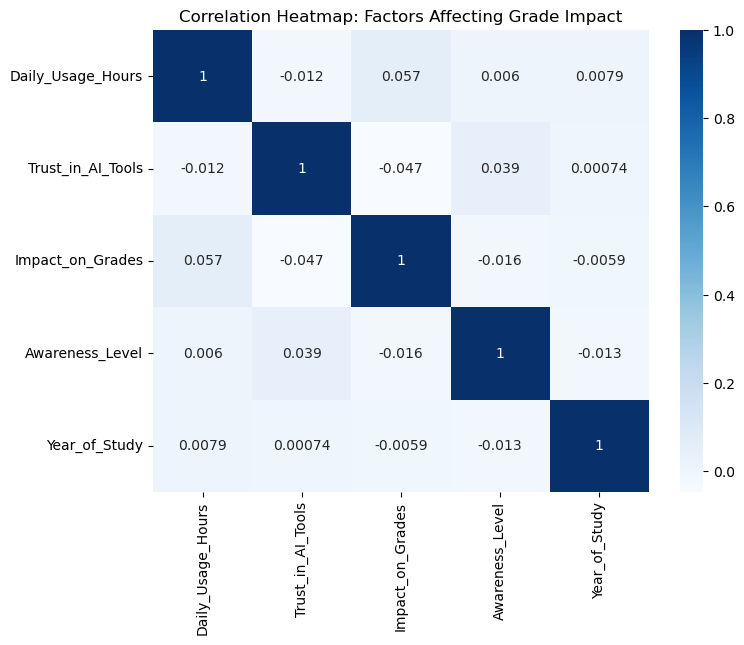

In [26]:
#Task 6: Identify Which Factors Most Strongly Affect Grade Impact
import seaborn as sns

# Select numeric columns for correlation
num_cols = ["Daily_Usage_Hours", "Trust_in_AI_Tools", "Impact_on_Grades", "Awareness_Level", "Year_of_Study"]
corr_matrix = df[num_cols].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Heatmap: Factors Affecting Grade Impact")
plt.show()



In [27]:
#MACHINE LEARNING

#Task 7: Predict Students’ Willingness to Pay for AI Tools (Classification)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load data
df = pd.read_csv("Students.csv")

# Encode categorical columns
le = LabelEncoder()
df["Willing_to_Pay_for_Access"] = le.fit_transform(df["Willing_to_Pay_for_Access"])
df["AI_Tools_Used"] = le.fit_transform(df["AI_Tools_Used"])
df["Stream"] = le.fit_transform(df["Stream"])

# Select features and target
X = df[["Daily_Usage_Hours", "Trust_in_AI_Tools", "Awareness_Level", "Impact_on_Grades", "AI_Tools_Used", "Stream"]]
y = df["Willing_to_Pay_for_Access"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.49557522123893805

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51       454
           1       0.49      0.47      0.48       450

    accuracy                           0.50       904
   macro avg       0.50      0.50      0.50       904
weighted avg       0.50      0.50      0.50       904



In [28]:
#Task 8: Predict Impact on Grades (Regression)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare data
X = df[["Daily_Usage_Hours", "Trust_in_AI_Tools", "Awareness_Level", "Year_of_Study"]]
y = df["Impact_on_Grades"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))



MAE: 1.9570681979161748
R² Score: 0.0025976130777390916


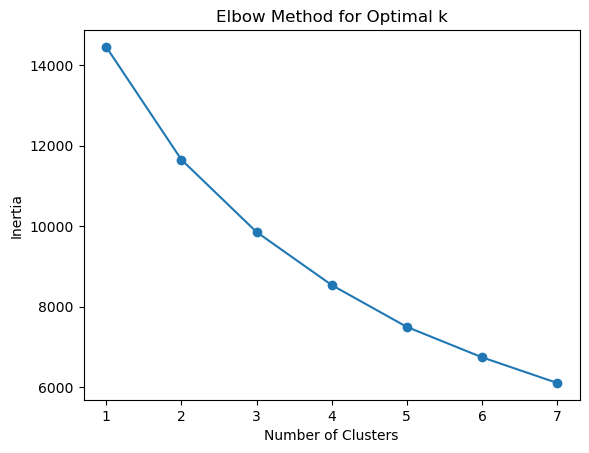

         Daily_Usage_Hours  Trust_in_AI_Tools  Impact_on_Grades
Cluster                                                        
0                 2.738501           1.768303          0.305771
1                 2.526455           4.408390         -0.446062
2                 2.428327           2.898054          0.138521


In [31]:
#Task 9: Cluster Students Based on AI Usage Patterns (Unsupervised Learning)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant numeric features
features = df[["Daily_Usage_Hours", "Trust_in_AI_Tools", "Awareness_Level", "Impact_on_Grades"]]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Find optimal cluster count (Elbow method)
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 8), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Apply clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print(df.groupby("Cluster")[["Daily_Usage_Hours", "Trust_in_AI_Tools", "Impact_on_Grades"]].mean())

from sklearn.cluster import KMeans

# OLD (causes FutureWarning)
# kmeans = KMeans(n_clusters=3)

# NEW (explicitly set n_init)
kmeans = KMeans(n_clusters=3, n_init=10)  # or n_init='auto' if using sklearn ≥ 1.3




Accuracy: 0.6036866359447005


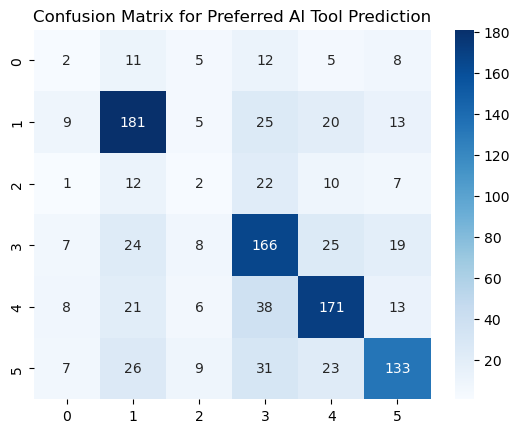

In [32]:
#Task 4: Predict Preferred AI Tool (Multiclass Classification)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Encode target variable
df["Preferred_AI_Tool"] = le.fit_transform(df["Preferred_AI_Tool"])

# Prepare data
X = df[["Daily_Usage_Hours", "Trust_in_AI_Tools", "Awareness_Level", "Impact_on_Grades"]]
y = df["Preferred_AI_Tool"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Preferred AI Tool Prediction")
plt.show()
